# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io import wavfile
from scipy.signal import savgol_filter
from IPython.display import Audio
import scipy.fftpack as fftpack
import os
import shutil
%matplotlib inline

# Question 1

## Read the Audio File

In [2]:
sampling_freq, silent_knight = wavfile.read("HW4_audio/SilentKnight.wav")
silent_knight_L = silent_knight[:,0]; silent_knight_R = silent_knight[:,1]

## Check Out the Whole Spectrum (For Visualization Only)

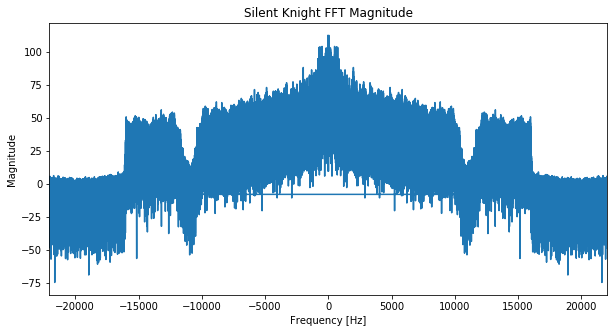

In [3]:
freqs = fftpack.fftfreq(len(silent_knight_L))*sampling_freq

silent_knight_L_norm = silent_knight_L/max(abs(silent_knight_L))
silent_knight_fft = fftpack.fft(silent_knight_L_norm)
silent_knight_fft_magn = np.abs(silent_knight_fft)
silent_knight_fft_magn = 10 * np.log(silent_knight_fft_magn + np.finfo(float).eps)

plt.figure(figsize=(10, 5))
plt.title("Silent Knight FFT Magnitude")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-sampling_freq/2, sampling_freq/2)
plt.plot(freqs, silent_knight_fft_magn)

## Plot a Frame

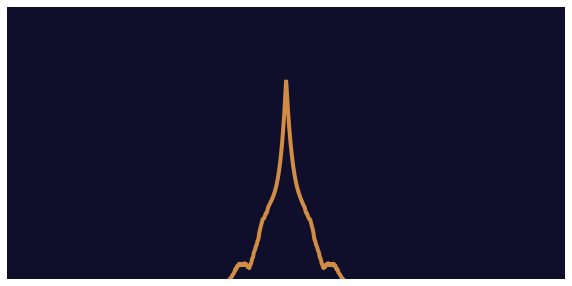

In [4]:
FPS = 30
idx = 10
y_limit = 3*max(silent_knight_fft_magn)/5 
window_length = sampling_freq // FPS
window_freqs = fftpack.fftfreq(len(silent_knight_L[idx*window_length:(idx+1)*window_length]))*window_length

silent_knight_fft_window = fftpack.fft(silent_knight_L_norm[idx*window_length:(idx+1)*window_length])
silent_knight_fft_magn_window = np.abs(silent_knight_fft_window)
silent_knight_fft_magn_window = 10 * np.log(silent_knight_fft_magn_window + np.finfo(float).eps)
silent_knight_fft_magn_window = savgol_filter(silent_knight_fft_magn_window, 101, 4)

plt.figure(figsize=(10, 5))
plt.axis('off')
plt.ylim(0, y_limit)
plt.axhspan(0, y_limit, facecolor='#0f0e2b', alpha=1)
plt.plot(window_freqs, silent_knight_fft_magn_window, color='#d18d44', linewidth='4')

## Save All Frames as Figures

In [5]:
if os.path.exists('temp'):
    shutil.rmtree('temp')
os.makedirs('temp')

# Frames of the YouTube video are rendered using 300 DPI
DPI = 50    # Change this for faster processing times
data_length = silent_knight.shape[0]//window_length

for idx in range(data_length):
    window_freqs = fftpack.fftfreq(len(silent_knight_L[idx*window_length:(idx+1)*window_length]))*window_length

    silent_knight_fft_window = fftpack.fft(silent_knight_L_norm[idx*window_length:(idx+1)*window_length])
    silent_knight_fft_magn_window = np.abs(silent_knight_fft_window)
    silent_knight_fft_magn_window = 10 * np.log(silent_knight_fft_magn_window + np.finfo(float).eps)
    silent_knight_fft_magn_window = savgol_filter(silent_knight_fft_magn_window, 101, 4)

    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.ylim(0, y_limit)
    plt.axhspan(0, y_limit, facecolor='#0f0e2b', alpha=1)
    plt.plot(window_freqs, silent_knight_fft_magn_window, color='#d18d44', linewidth='4')
    plt.savefig('temp/{0:05}.png'.format(idx), format='png', bbox_inches='tight', dpi=DPI)
    plt.close()

## Make a Video Out of Saved Figures

In [6]:
# Get the directories of images
images = [os.path.join('temp',f) for f in os.listdir('temp') if os.path.isfile(os.path.join('temp', f))]
images = sorted(images)

In [7]:
import moviepy.editor as mpy

clip = mpy.ImageSequenceClip(images, fps=FPS).set_audio(mpy.AudioFileClip("HW4_audio/SilentKnight.wav"))
clip.write_videofile('SilentKnightVisualized.mp4')
shutil.rmtree('temp')

chunk:   0%|          | 0/1815 [00:00<?, ?it/s, now=None]

Moviepy - Building video SilentKnightVisualized.mp4.
MoviePy - Writing audio in SilentKnightVisualizedTEMP_MPY_wvf_snd.mp3


t:   1%|          | 29/2468 [00:00<00:08, 284.91it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video SilentKnightVisualized.mp4



Moviepy - Done !
Moviepy - video ready SilentKnightVisualized.mp4


# Question 2

## Read the Audio File

In [8]:
sampling_freq, aphex_twin = wavfile.read("HW4_audio/aphex_twin_equation.wav")
aphex_twin_L = aphex_twin[:,0]; aphex_twin_R = aphex_twin[:,1]
aphex_twin_L_norm = aphex_twin_L/max(abs(aphex_twin_L))

## Perform Short-Time Fourier Transform

In [9]:
epsilon = 0.0001
audio_duration = aphex_twin_L.shape[0]//sampling_freq
window_size = 4096
stride = 2048
window_psec = sampling_freq//stride
aphex_twin_output = np.empty([audio_duration*window_psec, window_size])

for idx in range(aphex_twin_output.shape[0]):
    aphex_twin_output[idx] = np.abs(fftpack.fft(aphex_twin_L_norm[idx*stride:idx*stride+window_size]))
aphex_twin_output = 10 * np.log(aphex_twin_output + epsilon)

## Plot the Output

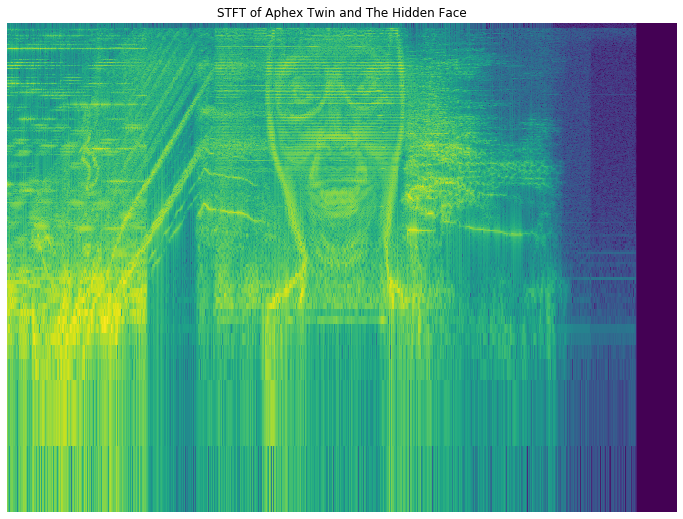

In [10]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(np.transpose(aphex_twin_output)[:aphex_twin_output.shape[1]//2])
plt.yscale("symlog")
plt.axis('off')
plt.title("STFT of Aphex Twin and The Hidden Face")
plt.show()